In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#查看tf 和 keras 的版本
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [2]:
# 从 keras.datasets 里面 加载 fashion_mnist 的数据集（很多种类的黑白图片）
fashion_mnist = keras.datasets.fashion_mnist

#拆分训练集和测试集
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

#把训练集拆分成 训练集和验证集   验证集取前5000个数据， 训练集取5000以后的数据
x_vaild, x_train = x_train_all[:5000], x_train_all[5000:]
y_vaild, y_train = y_train_all[:5000], y_train_all[5000:]

#打印 训练集、验证集、测试集的格式    （通过结果可以发现，验证集有5000个28*28的numpy数组，像素位在0~255 的数据，训练集有55000个，测试集有10000个）
print(x_vaild.shape, y_vaild.shape)
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


**显示数据**
  - 定义显示单个图片的函数

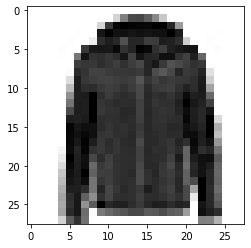

In [28]:
import matplotlib.pyplot as plt

def show_single_image(img_arr):
    
    #cmap 为 RGB values， 可查阅网址：https://blog.csdn.net/qq_28485501/article/details/82656614
    plt.imshow(img_arr, cmap='binary')
    plt.show()

#显示训练集的第一张图片
show_single_image(x_train[0]) 

  - 显示多个数据

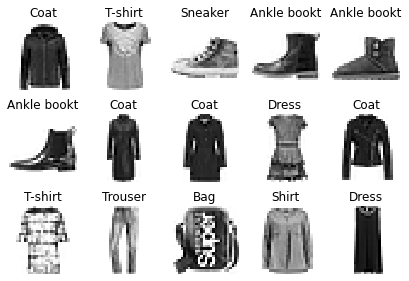

In [4]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    '''
     4个参数：
     n_rows: 显示图片的行数
     n_cols: 显示图片的列数
     
    '''
    #验证 训练集的里的数据长度一致
    assert len(x_data) == len(y_data)
    #验证 列*宽的数据个数小于总的训练集数据个数
    assert n_rows * n_cols < len(x_data)
    
    
    # 定义样本图大小
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col  
            plt.subplot(n_rows, n_cols, index+1) 
            plt.imshow(x_data[index], cmap = 'binary',interpolation='nearest')
            
            #关闭 每个图的刻度线
            plt.axis('off')
            
            #定义每个图的标题为 class_name[] 对应的索引  此处需要注意的是 y_data->y_train , 而y_train就是一个label，用来对应class_name
            plt.title(class_name[y_data[index]])
    plt.show()
    
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle bookt']
show_images(3, 5, x_train, y_train, class_name)

In [15]:
#tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#relu : y = max(0, x)
#softmax: 将向量变成概率分布   x = [x1, x2, x3] ,
#                          y = [e^x1/sum, e^x2/sum, e^x3/sum], 注意 此处的x1，x2, x3为x的一次方，二次方，三次方
#                          sum = e^x1 + e^x2 + e^x3 , 注意 此处的x1，x2, x3为x的一次方，二次方，三次方

#why sparce: y->index.  y->one_hot->[向量] , 如果y已经是向量即categorical_crossentropy, 如果不是即sparse_...
model.compile(loss = "sparse_categorical_crossentropy",  
               optimizer = "adam", #优化器
               metrics = ["accuracy"])

In [7]:
model.layers  #查看有多少层

In [8]:
model.summary()  #模型概况

#参数计算过程（Param）：
#[None, 784] *W + b -> [None, 300] W.shape [784,300], b =[300]   Param = 784*300+300 = 235500
#同理可求出30100， 1010

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
#使用fit方法进行训练模型，  epoches为训练次数， 结果中loss为待减少的损失值， accuracy为准确率, 验证准确率使用的数据集为x_vaild
history = model.fit(x_train, y_train, epochs = 10,
         validation_data = (x_vaild, y_vaild))  

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 148us/sample - loss: 2.2873 - accuracy: 0.7157 - val_loss: 0.6968 - val_accuracy: 0.7942
Epoch 2/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.6795 - accuracy: 0.7730 - val_loss: 0.6377 - val_accuracy: 0.8114
Epoch 3/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.5987 - accuracy: 0.7801 - val_loss: 0.5598 - val_accuracy: 0.7860
Epoch 4/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.5380 - accuracy: 0.8102 - val_loss: 0.5260 - val_accuracy: 0.8262
Epoch 5/10
55000/55000 [==============================] - 10s 178us/sample - loss: 0.4756 - accuracy: 0.8369 - val_loss: 0.4884 - val_accuracy: 0.8516
Epoch 6/10
55000/55000 [==============================] - 8s 149us/sample - loss: 0.4497 - accuracy: 0.8468 - val_loss: 0.4872 - val_accuracy: 0.8550
Epoch 7/10
55000/55000 [==========================

In [19]:
#使用model.evaluate() 方法来验证测试集的准确率
test_loss , test_acc = model.evaluate(x_test, y_test) 
print("   test_acc:",test_acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.4309 - accuracy: 0.8549
   test_acc: 0.8549


The first picture's prediction is:[5.48802917e-16 4.24384894e-15 4.72462008e-27 6.22993248e-13
 1.14495486e-32 6.73867157e-03 1.98818617e-16 4.98064794e-02
 2.95683985e-12 9.43454862e-01],so the result is:9
The first picture is  9
The first picture is  Ankle bookt
So the first picture:


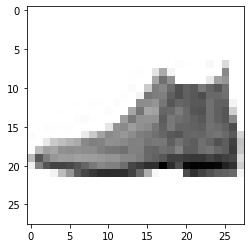

In [38]:
# 预测 ：  模型预测的测试集的第一个图片是否相同
predictions=model.predict(x_test) 
print("The first picture's prediction is:{},so the result is:{}".format(predictions[0],np.argmax(predictions[0])))
print("The first picture is ",y_test[0])
print("The first picture is ",class_name[np.argmax(predictions[0])])
print("So the first picture:")
show_single_image(x_test[0]) 

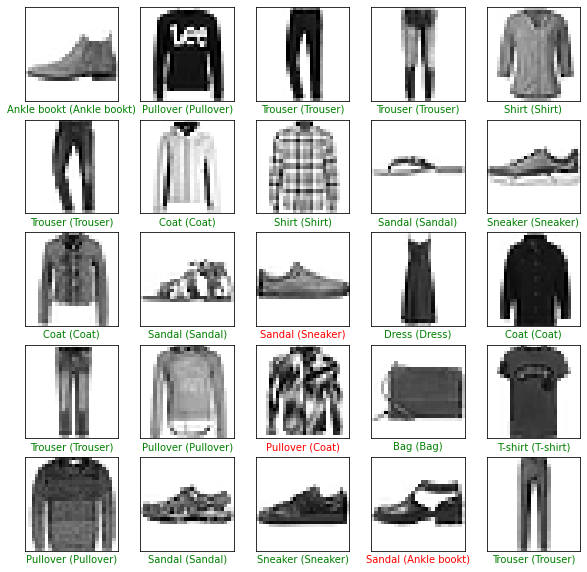

In [63]:
#显示模型预测结果和真实结果
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = t=y_test[i]
    
    #如果预测结果和真实结果一致，则为绿色，反之为红色
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_name[predicted_label],
                                class_name[true_label]),
               color=color)


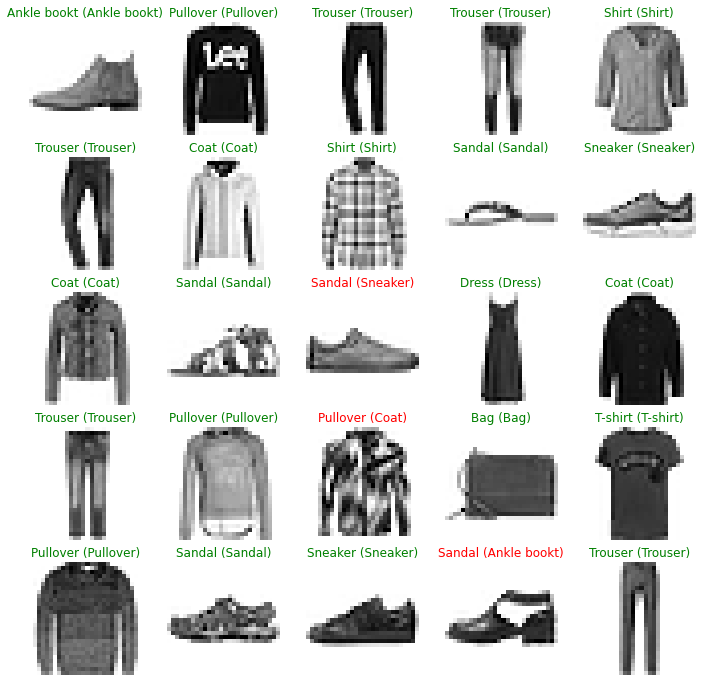

In [65]:
#展示前25个样本图，预测结果和真实结果是否一致，一致为绿色，反之为红色  （另一种显示格式）
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.grid('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary,interpolation='nearest')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title("{} ({})".format(class_name[predicted_label],
                                class_name[true_label]),
               color=color)
    